# Gather data 
+ extract the data from a file handed to you
+ scrape data off a web page
+ downloaded files from the internet
+ accessed data from API
+ put it all in a database

# 利用Python 收集各种来源和各种文件格式的数据，收集过程：

+ 获取数据(从互联网下载文件(txt)、抓取网页(html)、查询 API(json) 等)

+ 将数据导入编程环境(例如 Jupyter Notebook)

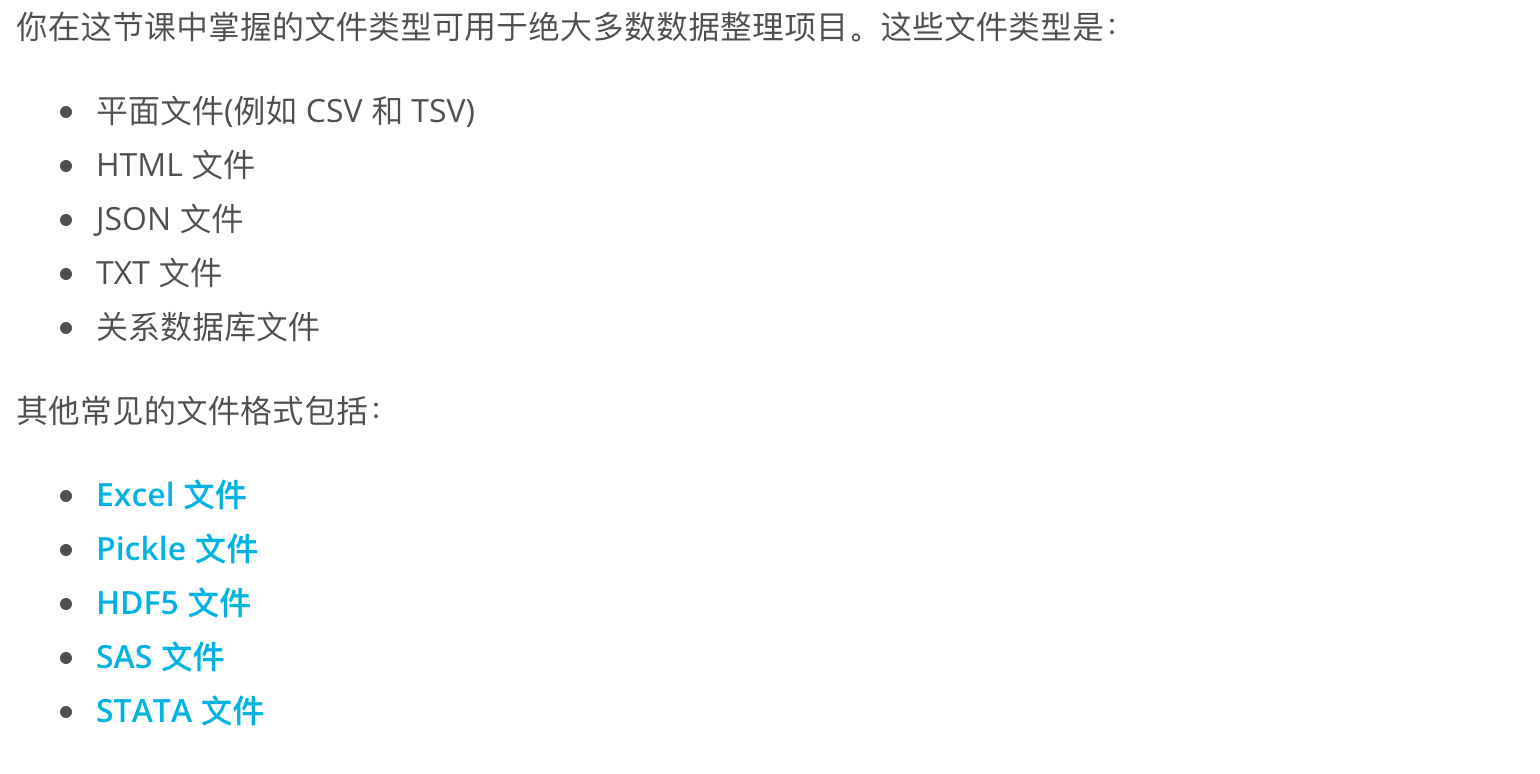

# 项目名称：寻找最好的电影
+  Rotten Tomatoes：前 100 部热门电影https://www.rottentomatoes.com/top/bestofrt/
+  RogerEbert.com  https://www.rogerebert.com/
+  Andreas Mueller: Word Cloud Generator in Python  https://amueller.github.io/word_cloud/

# 项目结构：

+ 首先，我们提出几个问题。
+ 然后，你将研究每个数据的来源，并回答这些问题，每个数据的来源和格式都不同。
+ 然后，将了解每种文件格式的结构。
+ 然后，将学习如何使用 Python 及其库来处理这种文件格式。
+ 最后，将实际收集每个数据，以便于以后在此基础上创建主数据集

# 项目需要收集的数据集：
+ 烂番茄评分（Rotten Tomatoes），

+ 罗杰.艾伯特评论（Roger Ebert reviews）

+ 维基百科电影海报图片

## 1.烂番茄评分data收集

 ###  获取数据：
 + 来源：抓取网页（web） 
 + 文件：html

```python

import requests
url = 'https://www.rottentomatoes.com.....'
response = requests.get(url)
#save HTML to file
with open(..., mode='wb') as file:
    file.write(response.content)
```



  

### 将数据导入编程环境: 解析数据(HTML文件)

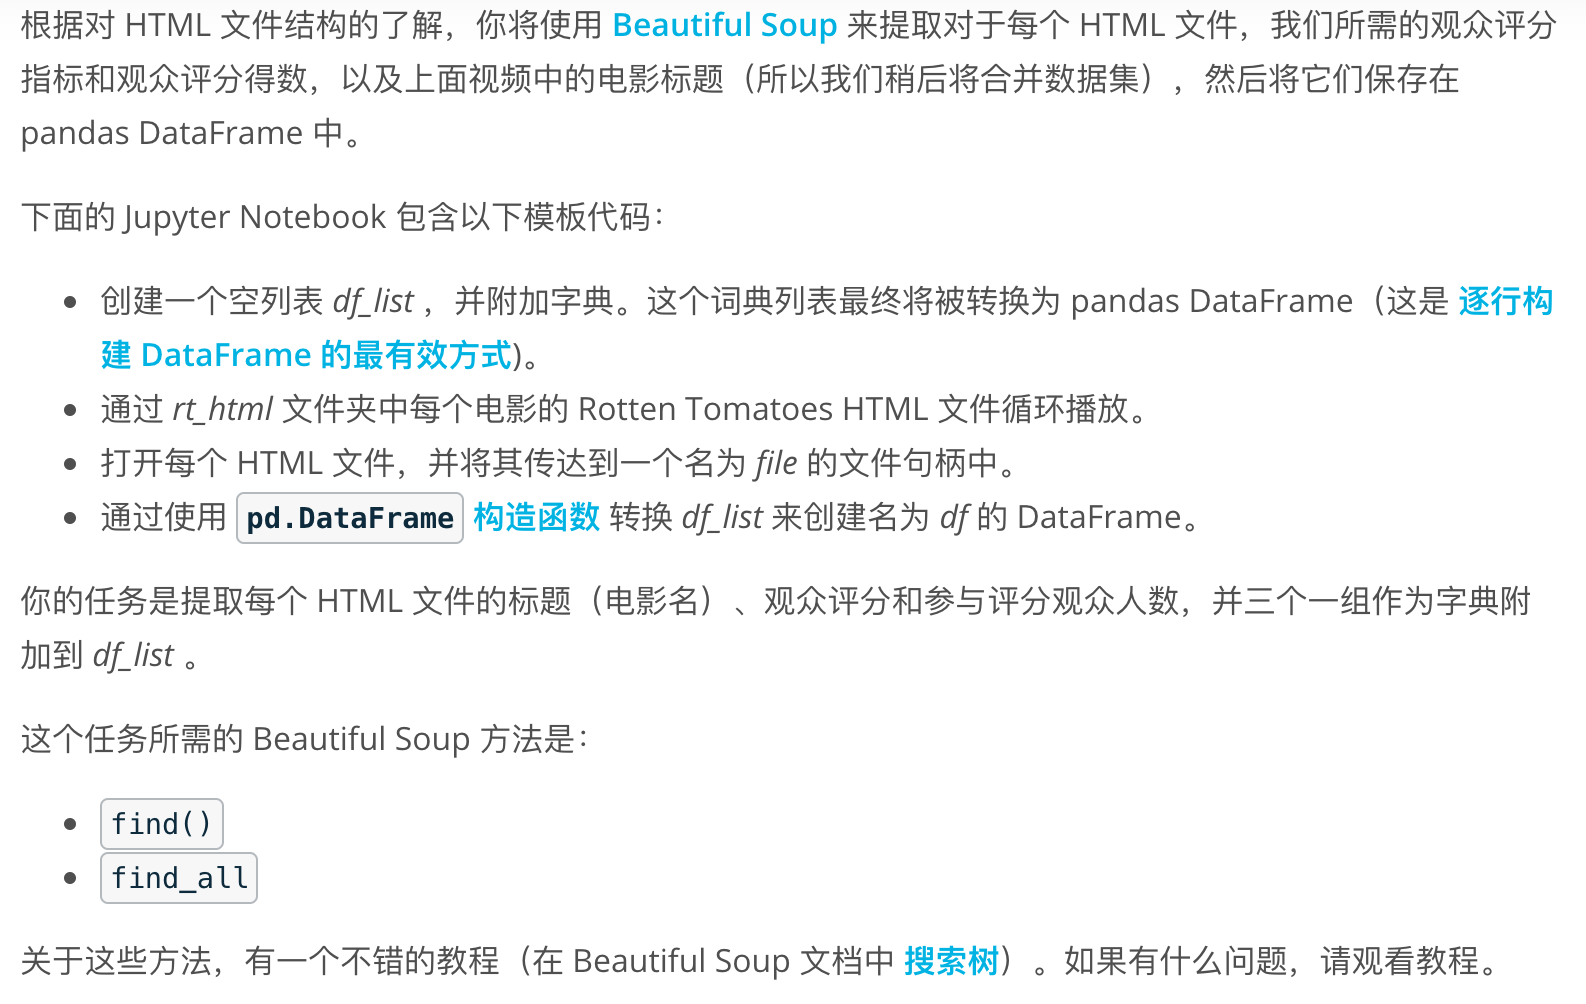

In [1]:
from bs4 import BeautifulSoup #用于解析html文件的python包
import os
import pandas as pd

In [3]:
# 字典列表可以逐个创建，随后转化为一个DataFrame（构造DataFrame有很多方法，基本有5种https://zhuanlan.zhihu.com/p/37856914）
df_list = []
#已经从互联网上下载好的html文件
folder = 'rt_html'
for movie_html in os.listdir(folder):
    with open(os.path.join(folder, movie_html)) as file:#join方法拼接路径
        soup = BeautifulSoup(file)
        #电影名称
        title = soup.find('title').contents[0][:-len(' - Rotten Tomatoes')]
#         print(title)
        #观众评分
        audience_score = soup.find('div', class_='audience-score meter').find('span').contents[0][: -1]
#         print(audience_score)
        num_audience_rating = soup.find('div', class_='audience-info hidden-xs superPageFontColor')
        num_audience_rating = num_audience_rating.find_all('div')[1].contents[2].strip().replace(',', '')
#         print(num_audience_rating)
        df_list.append({'title': title, 
                        'audience_score': int(audience_score), 
                        'num_audience_rating': int(num_audience_rating)})
df = pd.DataFrame(df_list, columns=['title', 'audience_score', 'num_audience_rating'])
df.head()

,title,audience_score,num_audience_rating
0,Zootopia (2016),92,98633
1,The Treasure of the Sierra Madre (1948),93,25627
2,All Quiet on the Western Front (1930),89,17768
3,Rear Window (1954),95,149458
4,Selma (2015),86,60533


In [33]:
# for i in os.listdir('rt_html'):
#     print(i)
# print(os.listdir('rt_html'))

In [34]:

# for i in os.listdir('ds'):
#     print(i)

In [35]:
# print(os.listdir('ds'))

# 2.罗杰.艾伯特评论（Roger Ebert reviews）data收集

### 获取数据 
+ 来源：从互联网下载
+ 文件：文本文件（注意文本文件的编码）

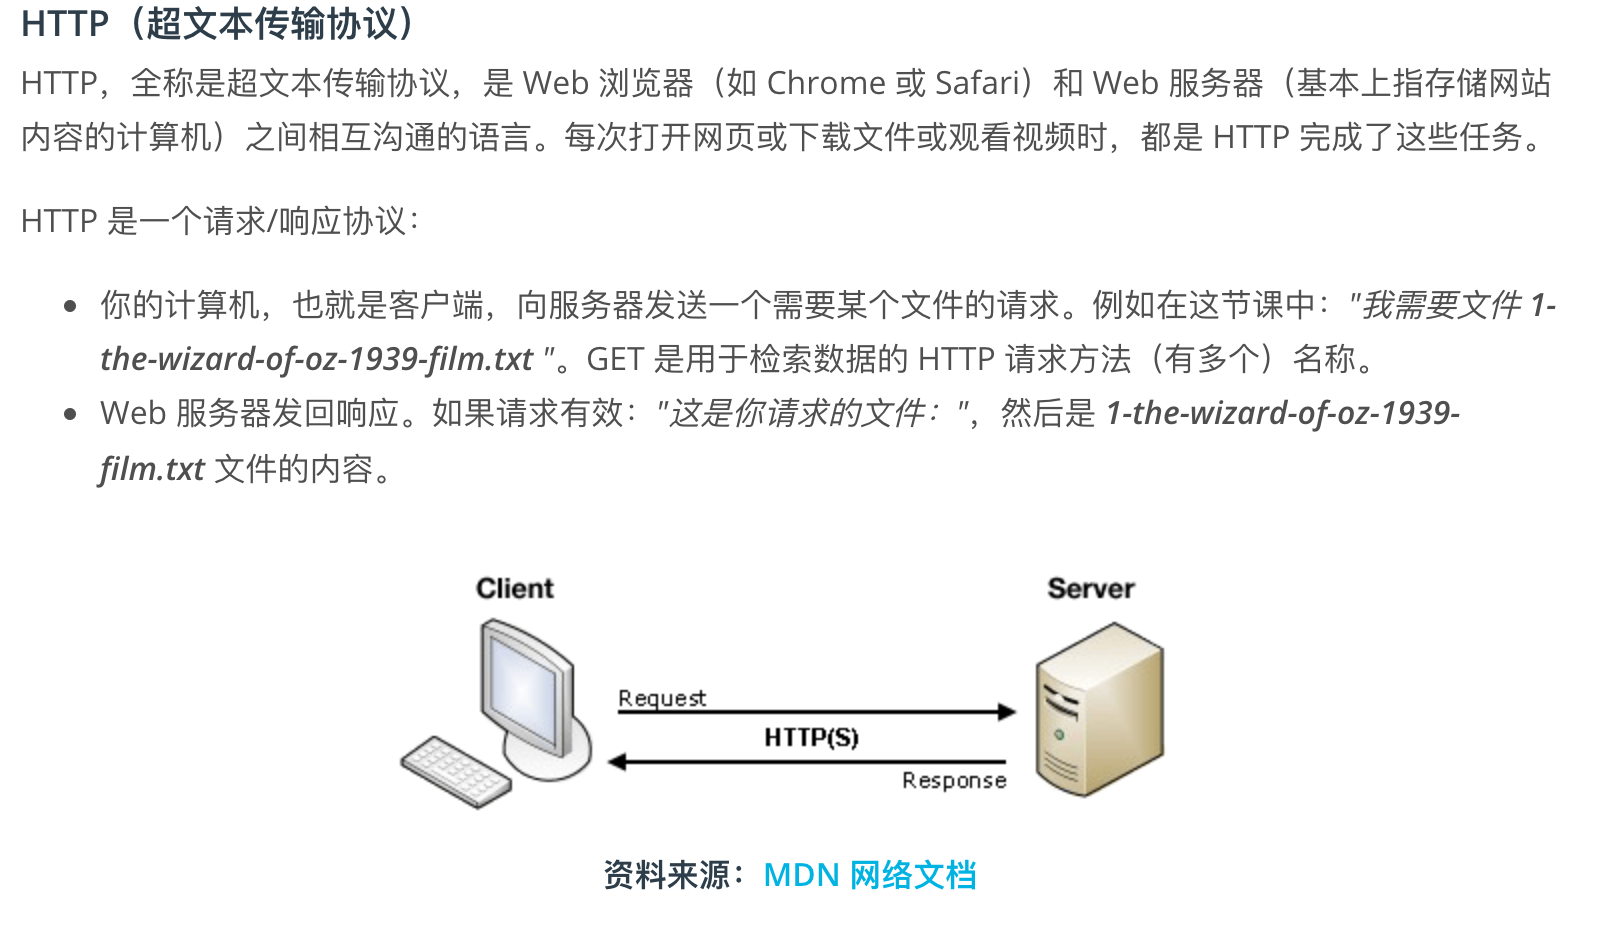

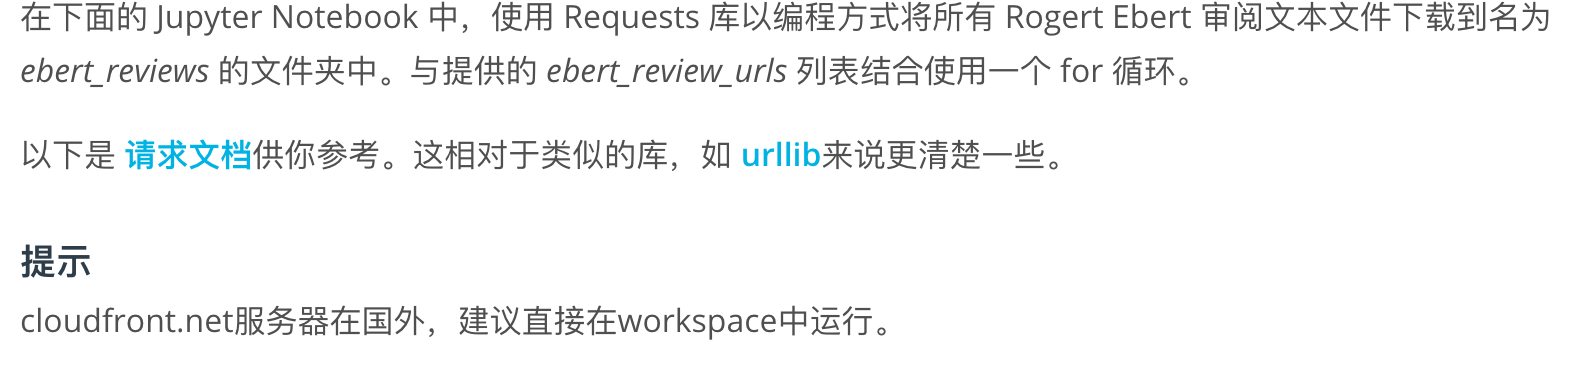

In [7]:
import requests
import os
from time import sleep
import urllib
from urllib.request import urlopen 
import requests



In [8]:
#make directory if it doesn't already exist
folder_name = 'exbert_review'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [9]:
ebert_review_urls = ['https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9900_1-the-wizard-of-oz-1939-film/1-the-wizard-of-oz-1939-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9901_2-citizen-kane/2-citizen-kane.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9901_3-the-third-man/3-the-third-man.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9902_4-get-out-film/4-get-out-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9902_5-mad-max-fury-road/5-mad-max-fury-road.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9902_6-the-cabinet-of-dr.-caligari/6-the-cabinet-of-dr.-caligari.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9903_7-all-about-eve/7-all-about-eve.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9903_8-inside-out-2015-film/8-inside-out-2015-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9903_9-the-godfather/9-the-godfather.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9904_10-metropolis-1927-film/10-metropolis-1927-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9904_11-e.t.-the-extra-terrestrial/11-e.t.-the-extra-terrestrial.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9904_12-modern-times-film/12-modern-times-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9904_14-singin-in-the-rain/14-singin-in-the-rain.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9905_15-boyhood-film/15-boyhood-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9905_16-casablanca-film/16-casablanca-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9905_17-moonlight-2016-film/17-moonlight-2016-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9906_18-psycho-1960-film/18-psycho-1960-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9906_19-laura-1944-film/19-laura-1944-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9906_20-nosferatu/20-nosferatu.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9907_21-snow-white-and-the-seven-dwarfs-1937-film/21-snow-white-and-the-seven-dwarfs-1937-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9907_22-a-hard-day27s-night-film/22-a-hard-day27s-night-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9907_23-la-grande-illusion/23-la-grande-illusion.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9908_25-the-battle-of-algiers/25-the-battle-of-algiers.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9908_26-dunkirk-2017-film/26-dunkirk-2017-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9908_27-the-maltese-falcon-1941-film/27-the-maltese-falcon-1941-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9909_29-12-years-a-slave-film/29-12-years-a-slave-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9909_30-gravity-2013-film/30-gravity-2013-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9909_31-sunset-boulevard-film/31-sunset-boulevard-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990a_32-king-kong-1933-film/32-king-kong-1933-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990a_33-spotlight-film/33-spotlight-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990a_34-the-adventures-of-robin-hood/34-the-adventures-of-robin-hood.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990b_35-rashomon/35-rashomon.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990b_36-rear-window/36-rear-window.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990b_37-selma-film/37-selma-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990c_38-taxi-driver/38-taxi-driver.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990c_39-toy-story-3/39-toy-story-3.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990c_40-argo-2012-film/40-argo-2012-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990d_41-toy-story-2/41-toy-story-2.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990d_42-the-big-sick/42-the-big-sick.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990d_43-bride-of-frankenstein/43-bride-of-frankenstein.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990d_44-zootopia/44-zootopia.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990e_45-m-1931-film/45-m-1931-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990e_46-wonder-woman-2017-film/46-wonder-woman-2017-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990e_48-alien-film/48-alien-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990f_49-bicycle-thieves/49-bicycle-thieves.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990f_50-seven-samurai/50-seven-samurai.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990f_51-the-treasure-of-the-sierra-madre-film/51-the-treasure-of-the-sierra-madre-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9910_52-up-2009-film/52-up-2009-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9910_53-12-angry-men-1957-film/53-12-angry-men-1957-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9910_54-the-400-blows/54-the-400-blows.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9911_55-logan-film/55-logan-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9911_57-army-of-shadows/57-army-of-shadows.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9912_58-arrival-film/58-arrival-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9912_59-baby-driver/59-baby-driver.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9913_60-a-streetcar-named-desire-1951-film/60-a-streetcar-named-desire-1951-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9913_61-the-night-of-the-hunter-film/61-the-night-of-the-hunter-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9913_62-star-wars-the-force-awakens/62-star-wars-the-force-awakens.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9913_63-manchester-by-the-sea-film/63-manchester-by-the-sea-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9914_64-dr.-strangelove/64-dr.-strangelove.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9914_66-vertigo-film/66-vertigo-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9914_67-the-dark-knight-film/67-the-dark-knight-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9915_68-touch-of-evil/68-touch-of-evil.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9915_69-the-babadook/69-the-babadook.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9915_72-rosemary27s-baby-film/72-rosemary27s-baby-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9916_73-finding-nemo/73-finding-nemo.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9916_74-brooklyn-film/74-brooklyn-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9917_75-the-wrestler-2008-film/75-the-wrestler-2008-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9917_77-l.a.-confidential-film/77-l.a.-confidential-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9918_78-gone-with-the-wind-film/78-gone-with-the-wind-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9918_79-the-good-the-bad-and-the-ugly/79-the-good-the-bad-and-the-ugly.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9918_80-skyfall/80-skyfall.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9919_82-tokyo-story/82-tokyo-story.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9919_83-hell-or-high-water-film/83-hell-or-high-water-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9919_84-pinocchio-1940-film/84-pinocchio-1940-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9919_85-the-jungle-book-2016-film/85-the-jungle-book-2016-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991a_86-la-la-land-film/86-la-la-land-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991b_87-star-trek-film/87-star-trek-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991b_89-apocalypse-now/89-apocalypse-now.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991c_90-on-the-waterfront/90-on-the-waterfront.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991c_91-the-wages-of-fear/91-the-wages-of-fear.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991c_92-the-last-picture-show/92-the-last-picture-show.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991d_93-harry-potter-and-the-deathly-hallows-part-2/93-harry-potter-and-the-deathly-hallows-part-2.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991d_94-the-grapes-of-wrath-film/94-the-grapes-of-wrath-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991d_96-man-on-wire/96-man-on-wire.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991e_97-jaws-film/97-jaws-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991e_98-toy-story/98-toy-story.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991e_99-the-godfather-part-ii/99-the-godfather-part-ii.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991e_100-battleship-potemkin/100-battleship-potemkin.txt']


    
    
        

In [10]:

for ebert_review_url in ebert_review_urls:
    with open(os.path.join(folder_name, ebert_review_url.split('/')[-1]), mode='wb') as file:
        request = requests.get(ebert_review_url)
        file.write(request.content)
        brea

ConnectionError: HTTPSConnectionPool(host='d17h27t6h515a5.cloudfront.net', port=443): Max retries exceeded with url: /topher/2017/September/59ad9900_1-the-wizard-of-oz-1939-film/1-the-wizard-of-oz-1939-film.txt (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x1125c7438>: Failed to establish a new connection: [Errno 60] Operation timed out',))

堆栈溢出：使用 Python 时，这个代码中的 'wb' 是什么意思?
https://stackoverflow.com/questions/2665866/what-does-wb-mean-in-this-code-using-python

###  将数据导入编程环境：解析文件（文本文件）

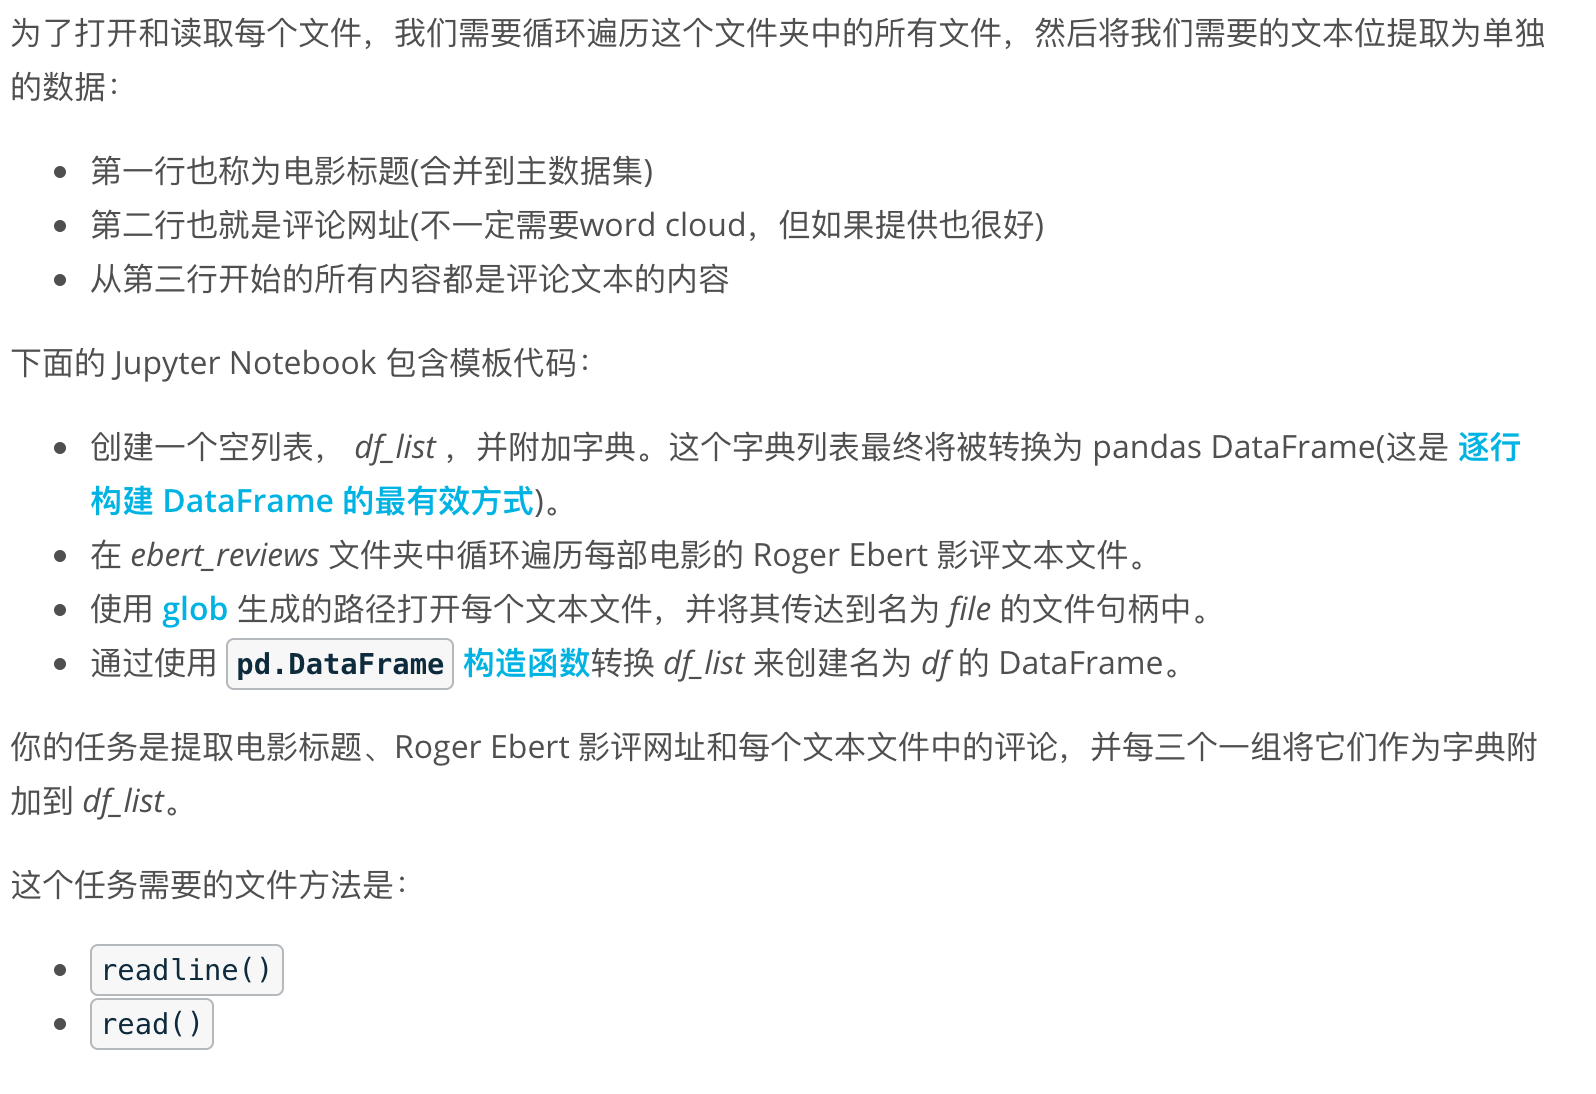

In [6]:
import glob
import pandas as pd

In [15]:
df_list = []
for ebert_review in glob.glob('ebert_reviews/*.txt'):
    with open(ebert_review, encoding='utf-8') as file:
#         print(file.read())
        title = file.readline()[:-1]
        review_url = file.readline()[:-1]
        review_text = file.read()
        df_list.append({'title': title, 'review_url': review_url, 'review_text': review_text})
df = pd.DataFrame(df_list, columns=['title', 'review_url', 'review_text'])
        
df.head()        
        

,title,review_url,review_text
0,Dunkirk (2017),http://www.rogerebert.com/reviews/dunkirk-2017,"Lean and ambitious, unsentimental and bombasti..."
1,Army of Shadows (L'Armée des ombres) (1969),http://www.rogerebert.com/reviews/great-movie-...,"Jean-Pierre Melville's ""Army of Shadows"" is ab..."
2,Alien (1979),http://www.rogerebert.com/reviews/great-movie-...,"At its most fundamental level, ""Alien"" is a mo..."
3,The Bride of Frankenstein (1935),http://www.rogerebert.com/reviews/great-movie-...,To a new world of gods and monsters.\n\nSo int...
4,The 400 Blows (Les Quatre cents coups) (1959),http://www.rogerebert.com/reviews/great-movie-...,I demand that a film express either the joy of...


## 3.维基百科电影海报图 data 收集

###  数据获取：
+ 来源：混搭--以API，以编程方式从互联网下载文件和JSON
+ 文件：图片

在你已经有了关于API、以编程方式从互联网下载文件和JSON的相足够经验后，可以下载 Roger Ebert 影评 Word clouds 中的所有电影海报图

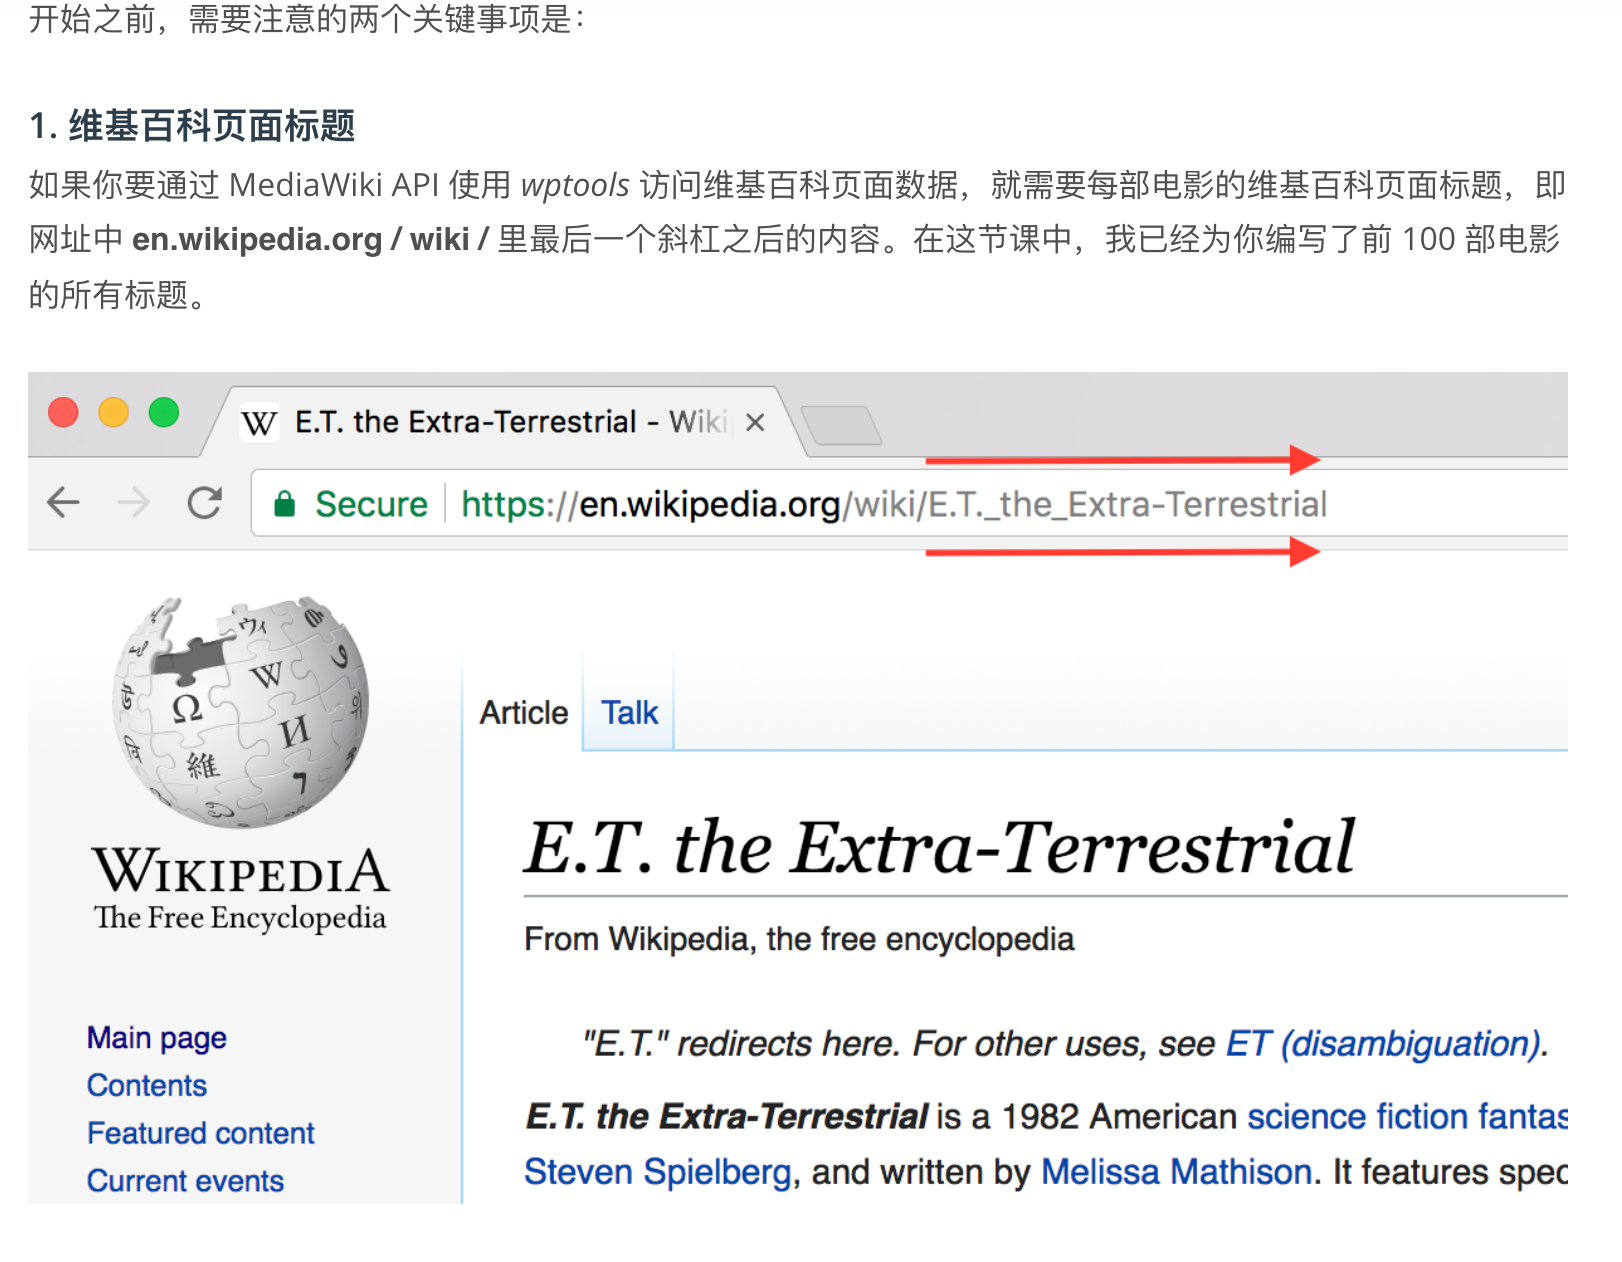

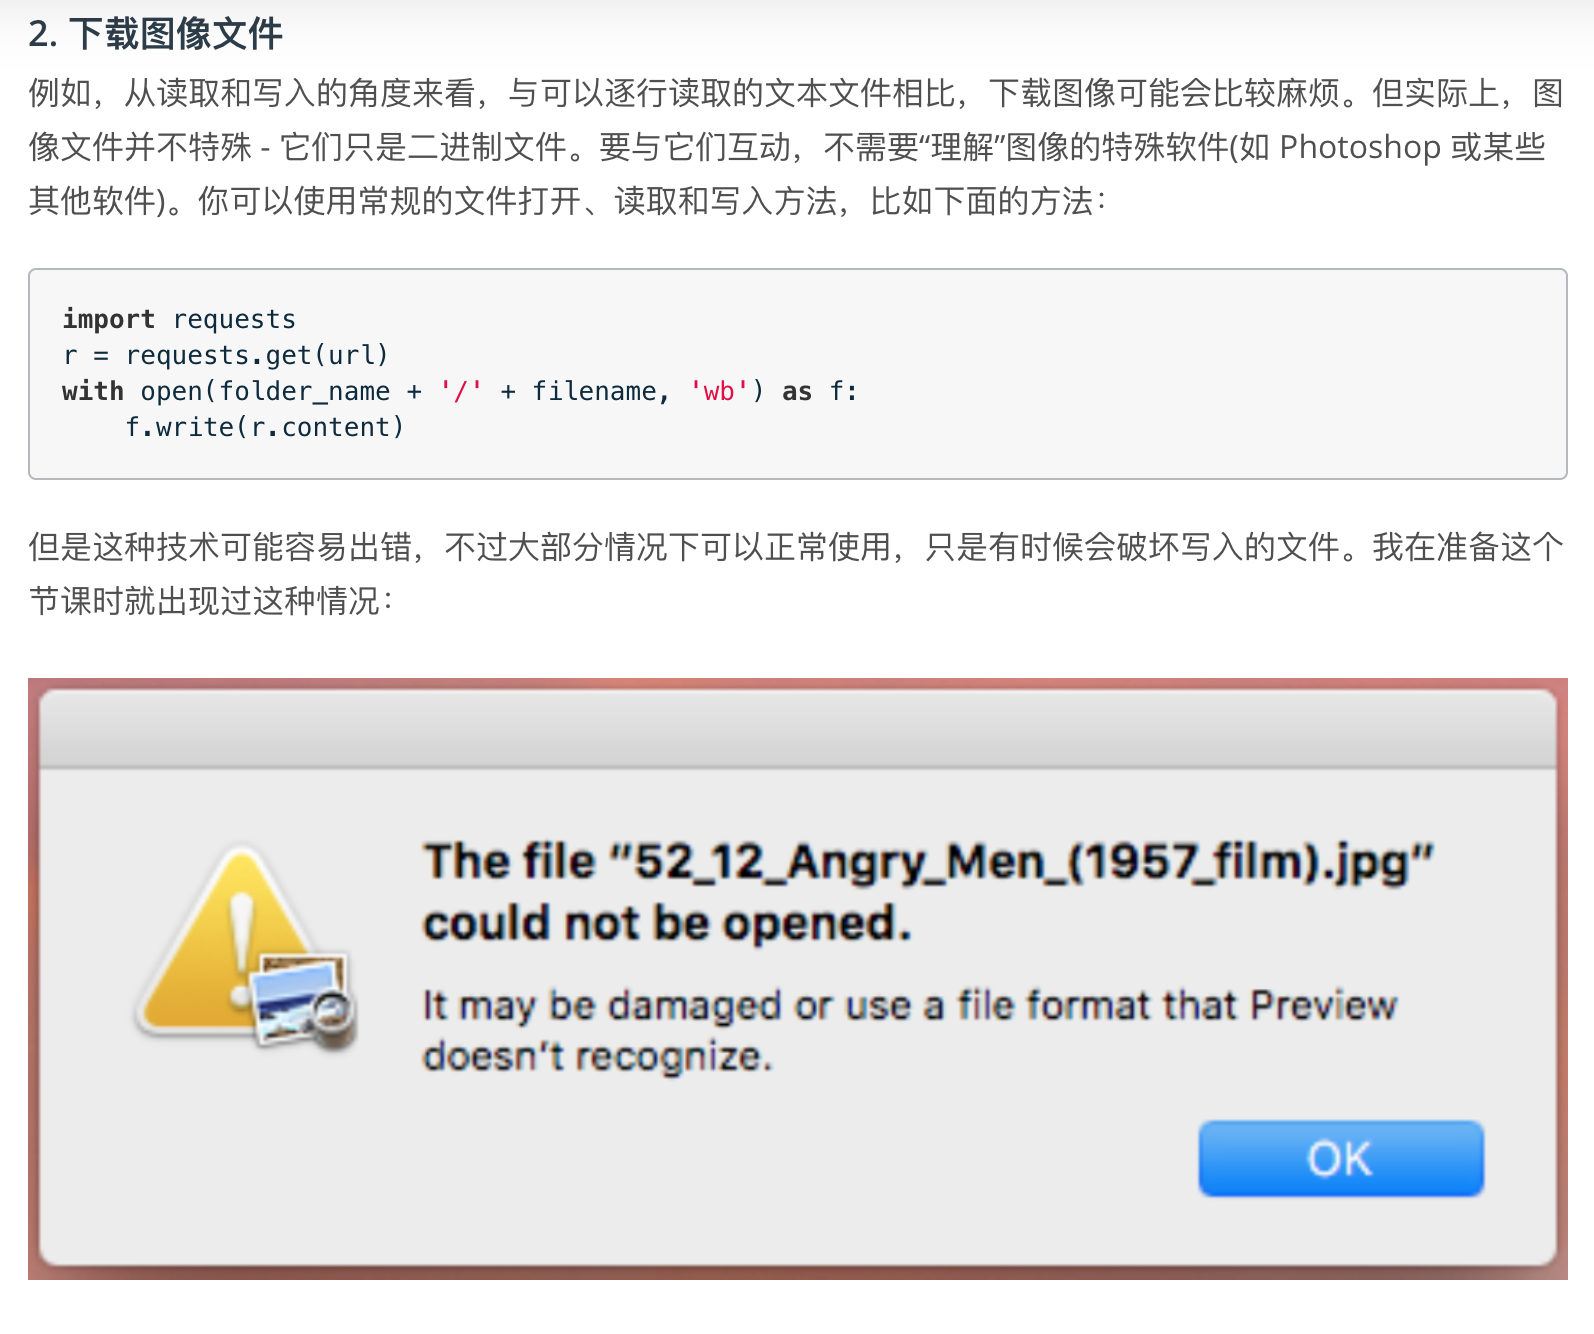

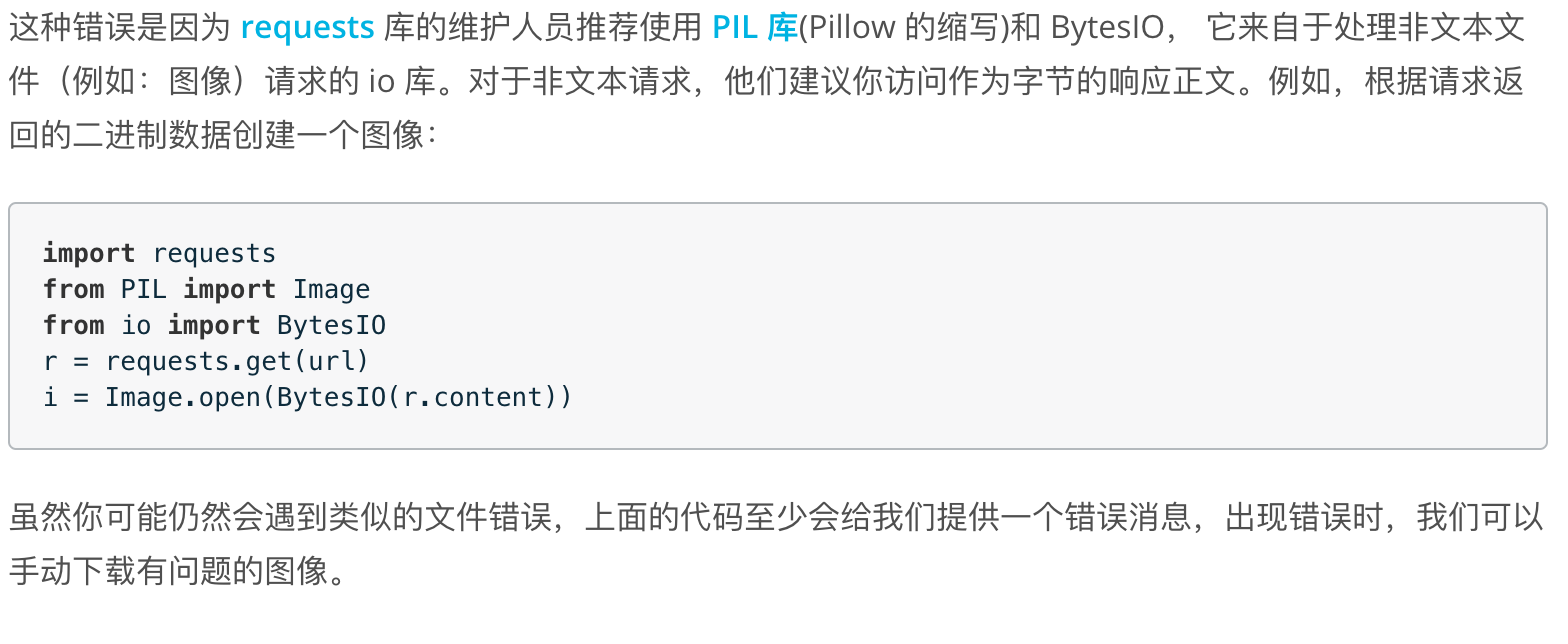

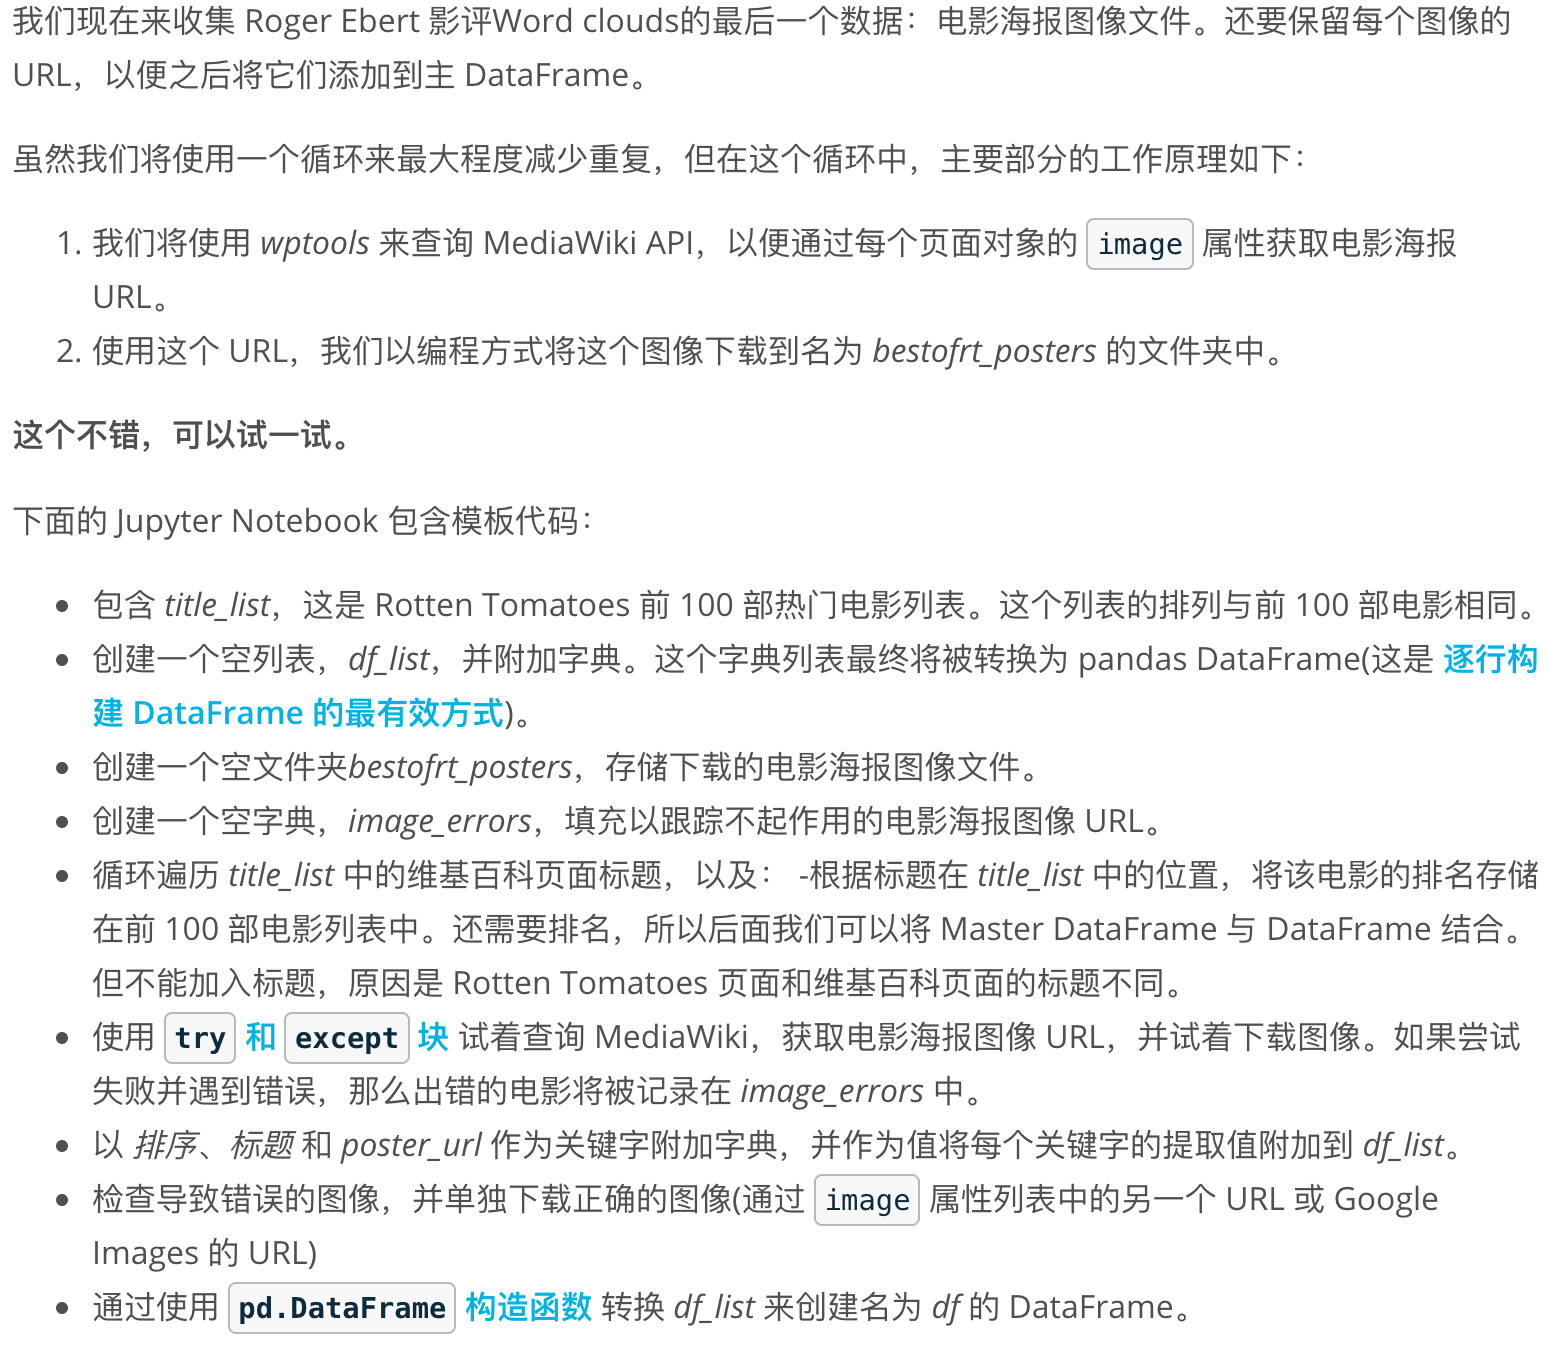

In [12]:
import pandas as pd
import wptools
import os
import requests
from PIL import Image
from io import BytesIO

In [13]:
title_list = [
 'The_Wizard_of_Oz_(1939_film)',
 'Citizen_Kane',
 'The_Third_Man',
 'Get_Out_(film)',
 'Mad_Max:_Fury_Road',
 'The_Cabinet_of_Dr._Caligari',
 'All_About_Eve',
 'Inside_Out_(2015_film)',
 'The_Godfather',
 'Metropolis_(1927_film)',
 'E.T._the_Extra-Terrestrial',
 'Modern_Times_(film)',
 'It_Happened_One_Night',
 "Singin'_in_the_Rain",
 'Boyhood_(film)',
 'Casablanca_(film)',
 'Moonlight_(2016_film)',
 'Psycho_(1960_film)',
 'Laura_(1944_film)',
 'Nosferatu',
 'Snow_White_and_the_Seven_Dwarfs_(1937_film)',
 "A_Hard_Day%27s_Night_(film)",
 'La_Grande_Illusion',
 'North_by_Northwest',
 'The_Battle_of_Algiers',
 'Dunkirk_(2017_film)',
 'The_Maltese_Falcon_(1941_film)',
 'Repulsion_(film)',
 '12_Years_a_Slave_(film)',
 'Gravity_(2013_film)',
 'Sunset_Boulevard_(film)',
 'King_Kong_(1933_film)',
 'Spotlight_(film)',
 'The_Adventures_of_Robin_Hood',
 'Rashomon',
 'Rear_Window',
 'Selma_(film)',
 'Taxi_Driver',
 'Toy_Story_3',
 'Argo_(2012_film)',
 'Toy_Story_2',
 'The_Big_Sick',
 'Bride_of_Frankenstein',
 'Zootopia',
 'M_(1931_film)',
 'Wonder_Woman_(2017_film)',
 'The_Philadelphia_Story_(film)',
 'Alien_(film)',
 'Bicycle_Thieves',
 'Seven_Samurai',
 'The_Treasure_of_the_Sierra_Madre_(film)',
 'Up_(2009_film)',
 '12_Angry_Men_(1957_film)',
 'The_400_Blows',
 'Logan_(film)',
 'All_Quiet_on_the_Western_Front_(1930_film)',
 'Army_of_Shadows',
 'Arrival_(film)',
 'Baby_Driver',
 'A_Streetcar_Named_Desire_(1951_film)',
 'The_Night_of_the_Hunter_(film)',
 'Star_Wars:_The_Force_Awakens',
 'Manchester_by_the_Sea_(film)',
 'Dr._Strangelove',
 'Frankenstein_(1931_film)',
 'Vertigo_(film)',
 'The_Dark_Knight_(film)',
 'Touch_of_Evil',
 'The_Babadook',
 'The_Conformist_(film)',
 'Rebecca_(1940_film)',
 "Rosemary%27s_Baby_(film)",
 'Finding_Nemo',
 'Brooklyn_(film)',
 'The_Wrestler_(2008_film)',
 'The_39_Steps_(1935_film)',
 'L.A._Confidential_(film)',
 'Gone_with_the_Wind_(film)',
 'The_Good,_the_Bad_and_the_Ugly',
 'Skyfall',
 'Rome,_Open_City',
 'Tokyo_Story',
 'Hell_or_High_Water_(film)',
 'Pinocchio_(1940_film)',
 'The_Jungle_Book_(2016_film)',
 'La_La_Land_(film)',
 'Star_Trek_(film)',
 'High_Noon',
 'Apocalypse_Now',
 'On_the_Waterfront',
 'The_Wages_of_Fear',
 'The_Last_Picture_Show',
 'Harry_Potter_and_the_Deathly_Hallows_–_Part_2',
 'The_Grapes_of_Wrath_(film)',
 'Roman_Holiday',
 'Man_on_Wire',
 'Jaws_(film)',
 'Toy_Story',
 'The_Godfather_Part_II',
 'Battleship_Potemkin'
]

In [14]:
folder_name = 'bestofrt_posters'
#如果没有目录，创建目录
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

由于服务器在国外，代码运行会出现错误

```python
# 字典列表可以逐个创建文件，随后转化为一个 DataFrame
df_list = []
image_errors = {}
for title in title_list:
    try:
        # 这个单元格较慢，所以输出排行时计算剩余时间
        ranking = title_list.index(title) + 1
        print(ranking)
        page = wptools.page(title, silent=True)
        # 这里是你的代码 (三行)
        images = page.get().data['image']
        # 第一个图片通常是海报
        first_image_url = images[0]['url']
        r = requests.get(first_image_url)
        # 下载电影海报图片
        i = Image.open(BytesIO(r.content))
        image_file_format = first_image_url.split('.')[-1]
        i.save(folder_name + "/" + str(ranking) + "_" + title + '.' + image_file_format)
        # 添加到字典列表中
        df_list.append({'ranking': int(ranking),
                        'title': title,
                        'poster_url': first_image_url})
    
    # 这不是抓住所有例外情况的最佳实践，但是适用于这一小段短小的程序脚本
    except Exception as e:
        print(str(ranking) + "_" + title + ": " + str(e))
        image_errors[str(ranking) + "_" + title] = images
```        

## 4.关联数据库和 pandas（学习关系型数据库比如SQL）

In [7]:
import pandas as pd

假设这个记事本包含整个课程中所有收集的数据，以及这些场景背后的评估和清理代码，最终产品是混合后的主 DataFrame，称为 df

In [8]:
df = pd.read_csv('bestofrt_master.csv')

In [9]:
df.head(3)

,ranking,title,critic_score,number_of_critic_ratings,audience_score,number_of_audience_ratings,review_url,review_text,poster_url
0,1,The Wizard of Oz (1939),99,110,89,874425,http://www.rogerebert.com/reviews/great-movie-...,As a child I simply did not notice whether a m...,https://upload.wikimedia.org/wikipedia/commons...
1,2,Citizen Kane (1941),100,75,90,157274,http://www.rogerebert.com/reviews/great-movie-...,“I don't think any word can explain a man's li...,https://upload.wikimedia.org/wikipedia/en/c/ce...
2,3,The Third Man (1949),100,77,93,53081,http://www.rogerebert.com/reviews/great-movie-...,Has there ever been a film where the music mor...,https://upload.wikimedia.org/wikipedia/en/2/21...


###  关联数据库

In [10]:
from sqlalchemy import create_engine

In [11]:
#创建SQLchemy 引擎和空白bestofrt 数据库
#bestofrt.db不会出现在jupyter notebook 指示板中
engine = create_engine('sqlite:///bestofrt.db')

### 将pandas DataFrame 保存在数据库中
将数据保存在清理后的数据库主要数据集（bestofrt_master)中

In [12]:
#将清理后的主DataFrame（df）保存在表格中，命名为bestofrt.db
#bestofrt.db 可以在jupyter notebook 指示板中显示
df.to_sql('master', engine, index=False)

### 把数据库数据读回一个 pandas DataFrame

In [13]:
df_gather = pd.read_sql('SELECT * FROM master', engine)

In [14]:
df_gather.head(3)

,ranking,title,critic_score,number_of_critic_ratings,audience_score,number_of_audience_ratings,review_url,review_text,poster_url
0,1,The Wizard of Oz (1939),99,110,89,874425,http://www.rogerebert.com/reviews/great-movie-...,As a child I simply did not notice whether a m...,https://upload.wikimedia.org/wikipedia/commons...
1,2,Citizen Kane (1941),100,75,90,157274,http://www.rogerebert.com/reviews/great-movie-...,“I don't think any word can explain a man's li...,https://upload.wikimedia.org/wikipedia/en/c/ce...
2,3,The Third Man (1949),100,77,93,53081,http://www.rogerebert.com/reviews/great-movie-...,Has there ever been a film where the music mor...,https://upload.wikimedia.org/wikipedia/en/2/21...
